In [ ]:
conda install matplotlib

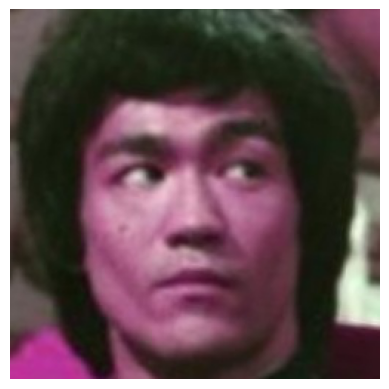

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the folder path
image_folder = r"Casia\CASIA-WebFace_crop"

# List all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]


# Load and display the first image
if image_files:
    img_path = os.path.join(image_folder, image_files[0])
    img = Image.open(img_path)
    
    # Show the image
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("No images found!")



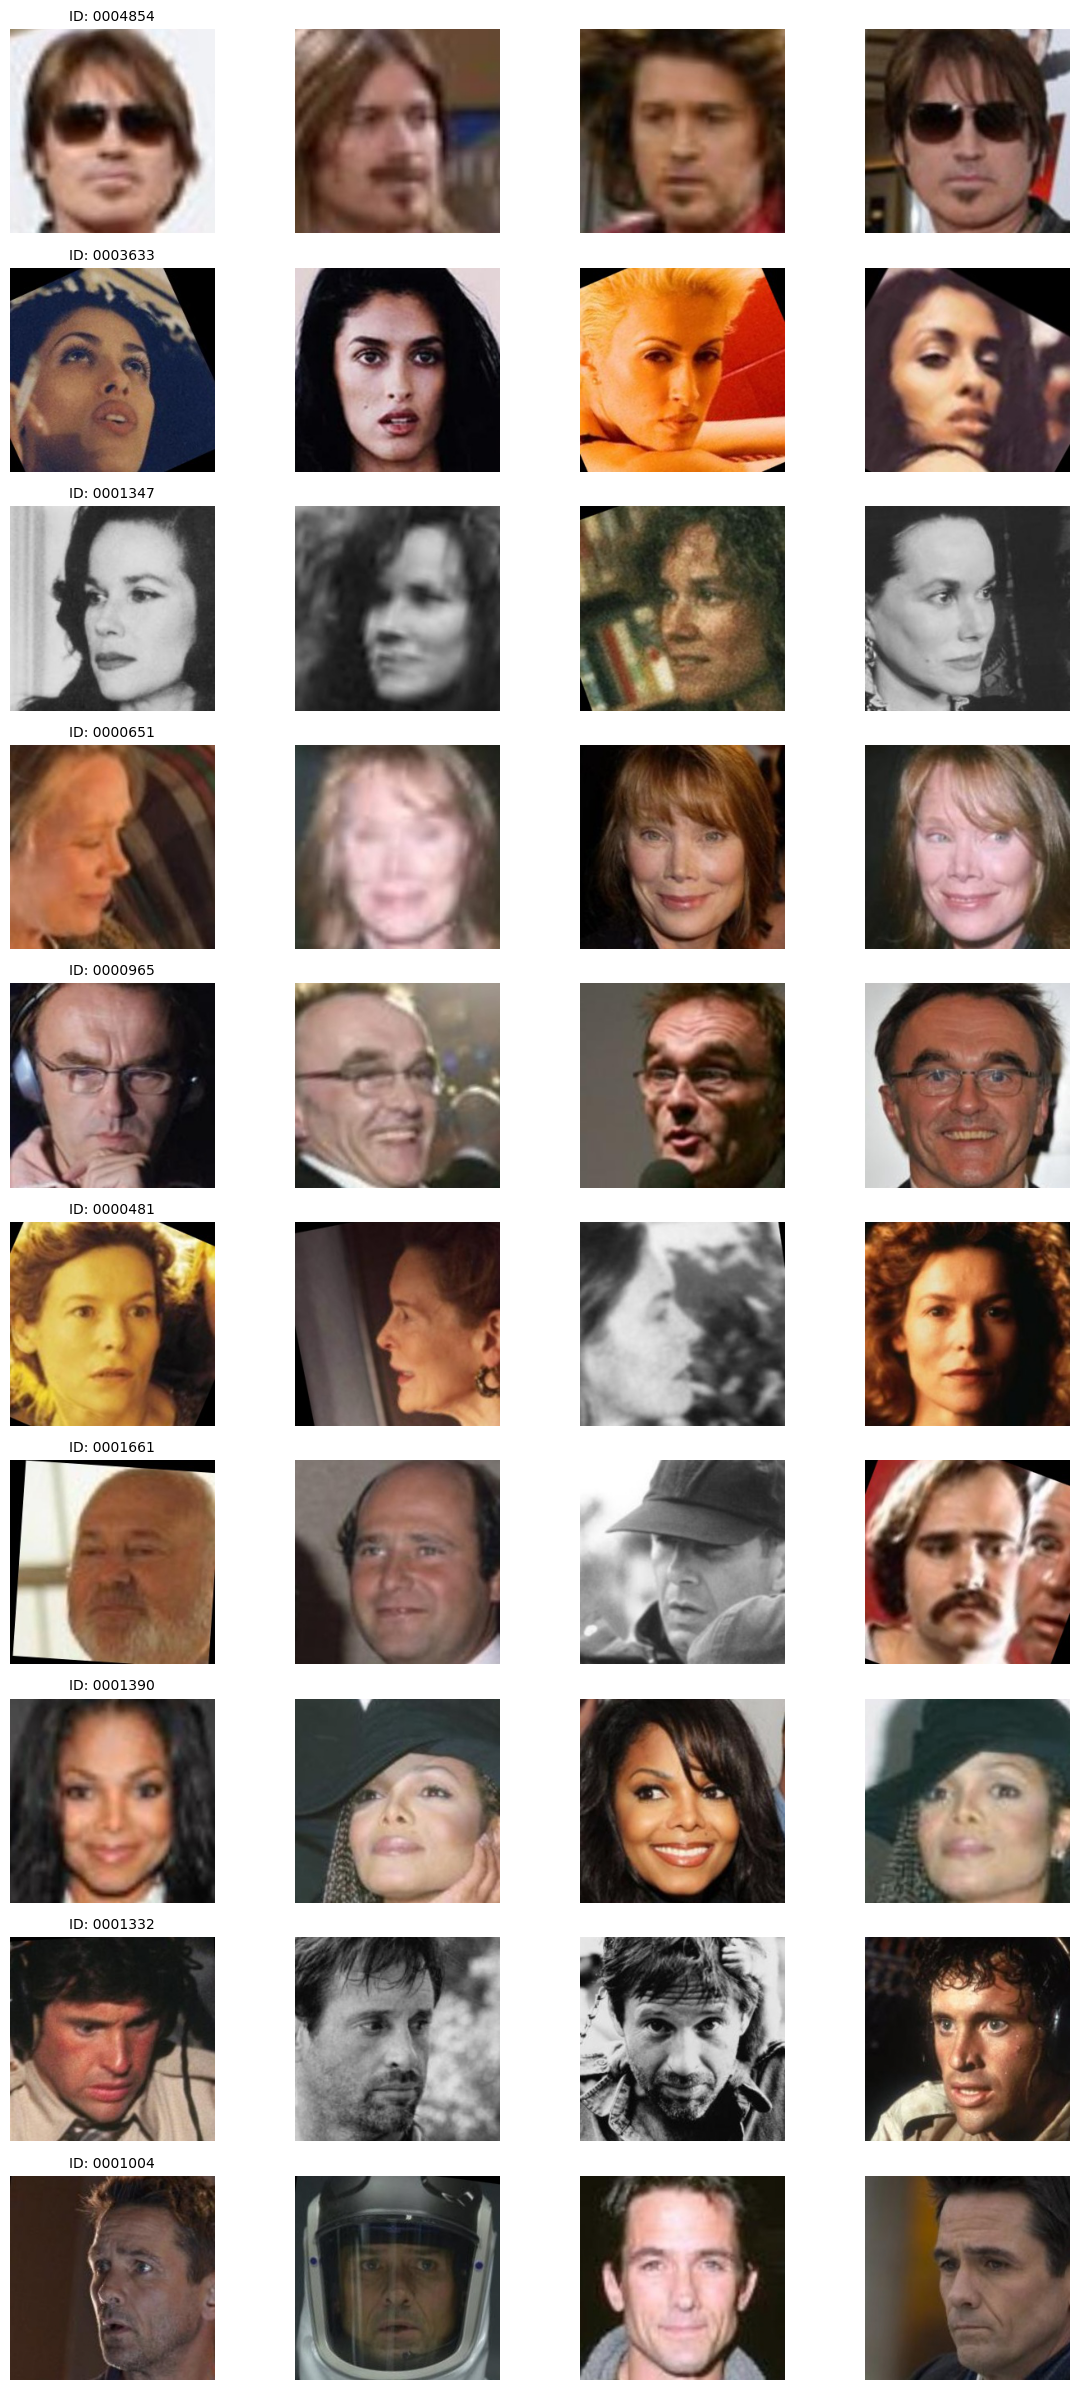

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the folder path
image_folder = r"Casia\CASIA-WebFace_crop"

# List all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Extract identities (assuming filename format: "identity_xxx.jpg")
identities = {}
for img in image_files:
    identity = img.split("_")[0]  # Extract identity name
    if identity not in identities:
        identities[identity] = []
    identities[identity].append(img)

# Filter 10 identities with at least 4 images each
valid_identities = {k: v for k, v in identities.items() if len(v) >= 4}
selected_identities = dict(random.sample(valid_identities.items(), 10))  # Pick 10 identities

# Display images
fig, axes = plt.subplots(10, 4, figsize=(12, 24))  # 10 rows, 4 columns

for row, (identity, imgs) in enumerate(selected_identities.items()):
    selected_images = random.sample(imgs, 4)  # Pick 4 images per identity
    for col, img_name in enumerate(selected_images):
        img_path = os.path.join(image_folder, img_name)
        img = Image.open(img_path)

        axes[row, col].imshow(img)
        axes[row, col].axis("off")
        if col == 0:
            axes[row, col].set_title(f"ID: {identity}", fontsize=10)

plt.tight_layout()
plt.show()


In [10]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# ---- CONFIGURATION ----
IMAGE_FOLDER = r"Casia\CASIA-WebFace_crop"
NUM_IDENTITIES = 1000  # Number of identities to select
IMAGES_PER_IDENTITY = 10  # Number of images per identity
CSV_OUTPUT_PATH = "identities_with_images.csv"  # CSV save location

# List all image files
image_files = [f for f in os.listdir(IMAGE_FOLDER) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Extract identities (assuming filename format: "identity_xxx.jpg")
identities = {}
for img in image_files:
    identity = img.split("_")[0]  # Extract identity name
    if identity not in identities:
        identities[identity] = []
    identities[identity].append(img)

# Filter identities that have at least the required number of images
valid_identities = {k: v for k, v in identities.items() if len(v) >= IMAGES_PER_IDENTITY}

# Select NUM_IDENTITIES randomly
selected_identities = dict(random.sample(valid_identities.items(), min(NUM_IDENTITIES, len(valid_identities))))

# ---- SAVE TO CSV ----
data = []
for identity, imgs in selected_identities.items():
    selected_images = random.sample(imgs, IMAGES_PER_IDENTITY)  # Pick required number of images
    for img_name in selected_images:
        img_path = os.path.join(IMAGE_FOLDER, img_name)
        data.append({"Identity": identity, "Image_Path": img_path})

df = pd.DataFrame(data)
df.to_csv(CSV_OUTPUT_PATH, index=False)
print(f"CSV saved: {CSV_OUTPUT_PATH}")




CSV saved: identities_with_images.csv


In [ ]:
import os
print(os.getcwd())  # This shows the current working directory


In [ ]:
import pandas as pd
df = pd.read_csv("identities_with_images.csv")

# Display the first 6 rows
# print(df.head(6))  


In [13]:
df.describe()

Identity
count  10000.000000
mean    2628.482000
std     2129.623483
min       45.000000
25%      880.750000
50%     1669.500000
75%     4899.250000
max    10736.000000

In [ ]:
pip install deepface tqdm pandas matplotlib


In [ ]:
import os
import pandas as pd
from tqdm import tqdm  # Progress bar
from deepface import DeepFace

# Load the pre-selected images from CSV
df = pd.read_csv("identities_with_images.csv")

# Make sure the CSV contains correct columns
if "Image_Path" not in df.columns or "Identity" not in df.columns:
    raise ValueError("CSV must contain 'Image_Path' and 'Identity' columns!")

# Store results
image_data = []

# Process each image
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Processing Images"):
    try:
        img_path = row["Image_Path"]
        identity = row["Identity"]

        # Extract DeepFace embeddings, age, gender, emotions
        embedding = DeepFace.represent(img_path=img_path, model_name="Facenet", enforce_detection=False)[0]["embedding"]
        analysis = DeepFace.analyze(img_path=img_path, actions=['age', 'gender', 'emotion'], enforce_detection=False, silent=True)[0]

        # Store processed data
        image_data.append({
            "Image_Path": img_path,
            "Identity": identity,
            "Age": analysis['age'],
            "Gender_Man": analysis['gender'].get("Man", 0),  # Keep original probability values
            "Gender_Woman": analysis['gender'].get("Woman", 0),
            "Emotion_Happy": analysis['emotion'].get("happy", 0),
            "Emotion_Sad": analysis['emotion'].get("sad", 0),
            "Emotion_Angry": analysis['emotion'].get("angry", 0),
            "Emotion_Surprise": analysis['emotion'].get("surprise", 0),
            "Emotion_Fear": analysis['emotion'].get("fear", 0),
            "Emotion_Disgust": analysis['emotion'].get("disgust", 0),
            "Emotion_Neutral": analysis['emotion'].get("neutral", 0),
            "Embedding": embedding
        })

    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Save results to CSV
df_labeled = pd.DataFrame(image_data)
df_labeled.to_csv("identities_with_images_labeled.csv", index=False)

# Final check
print("Processing complete! Labeled data saved as 'identities_with_images_labeled.csv'.")
# print(df_labeled.head())


In [7]:
import pandas as pd
final_df=pd.read_csv("identities_with_images_labeled.csv")

In [8]:
final_df.describe()

Identity           Age    Gender_Man  Gender_Woman  Emotion_Happy  \
count  10000.000000  10000.000000  1.000000e+04  1.000000e+04   1.000000e+04   
mean    2628.482000     33.907800  6.445723e+01  3.554277e+01   3.838408e+01   
std     2129.623483      6.709993  4.480644e+01  4.480644e+01   4.414093e+01   
min       45.000000     16.000000  1.631162e-12  6.682964e-08   1.716214e-18   
25%      880.750000     29.000000  1.078076e+00  5.699333e-02   3.719088e-02   
50%     1669.500000     33.000000  9.824367e+01  1.756335e+00   5.384894e+00   
75%     4899.250000     38.000000  9.994300e+01  9.892192e+01   9.516696e+01   
max    10736.000000     69.000000  1.000000e+02  1.000000e+02   1.000000e+02   

        Emotion_Sad  Emotion_Angry  Emotion_Surprise  Emotion_Fear  \
count  1.000000e+04   1.000000e+04      1.000000e+04  1.000000e+04   
mean   1.518186e+01   7.394428e+00      1.457534e+00  1.089934e+01   
std    2.586776e+01   1.854625e+01      8.626183e+00  2.246364e+01   
min    1.114092e-21   3.292686e-21      8.021420e-35  6.675200e-28   
25%    1.382497e-02   5.555565e-04      5.125483e-05  1.863726e-03   
50%    1.353328e+00   1.184256e-01      3.074222e-03  4.479282e-01   
75%    1.808715e+01   3.459377e+00      6.488284e-02  8.075066e+00   
max    1.000000e+02   9.999956e+01      9.999113e+01  9.999999e+01   

       Emotion_Disgust  Emotion_Neutral  
count     1.000000e+04     1.000000e+04  
mean      4.569249e-01     2.622583e+01  
std       4.687728e+00     3.437473e+01  
min       0.000000e+00     4.192056e-15  
25%       1.708626e-09     3.179839e-01  
50%       5.127647e-06     5.680738e+00  
75%       1.025226e-03     4.896494e+01  
max       9.930763e+01     9.999999e+01

In [9]:
import numpy as np
# Check for missing (NaN) values in each column
missing_values = final_df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Check for empty string values in each column
empty_values = (final_df == "").sum()
print("\nEmpty String Counts in Each Column:\n", empty_values)

# Identify numeric columns, excluding text-based ones
exclude_cols = ["Image_Path", "Identity", "Embedding"]
numeric_cols = final_df.columns.difference(exclude_cols)

# Find non-numeric values in numeric columns
non_numeric_mask = final_df[numeric_cols].applymap(lambda x: not isinstance(x, (int, float, np.number)))
invalid_rows = final_df[non_numeric_mask.any(axis=1)]

# Print problematic rows
print("\nRows with Non-Numeric Values in Numeric Columns:\n", invalid_rows)

Missing Values in Each Column:
 Image_Path          0
Identity            0
Age                 0
Gender_Man          0
Gender_Woman        0
Emotion_Happy       0
Emotion_Sad         0
Emotion_Angry       0
Emotion_Surprise    0
Emotion_Fear        0
Emotion_Disgust     0
Emotion_Neutral     0
Embedding           0
dtype: int64

Empty String Counts in Each Column:
 Image_Path          0
Identity            0
Age                 0
Gender_Man          0
Gender_Woman        0
Emotion_Happy       0
Emotion_Sad         0
Emotion_Angry       0
Emotion_Surprise    0
Emotion_Fear        0
Emotion_Disgust     0
Emotion_Neutral     0
Embedding           0
dtype: int64

Rows with Non-Numeric Values in Numeric Columns:
 Empty DataFrame
Columns: [Image_Path, Identity, Age, Gender_Man, Gender_Woman, Emotion_Happy, Emotion_Sad, Emotion_Angry, Emotion_Surprise, Emotion_Fear, Emotion_Disgust, Emotion_Neutral, Embedding]
Index: []


In [ ]:
pip install seaborn

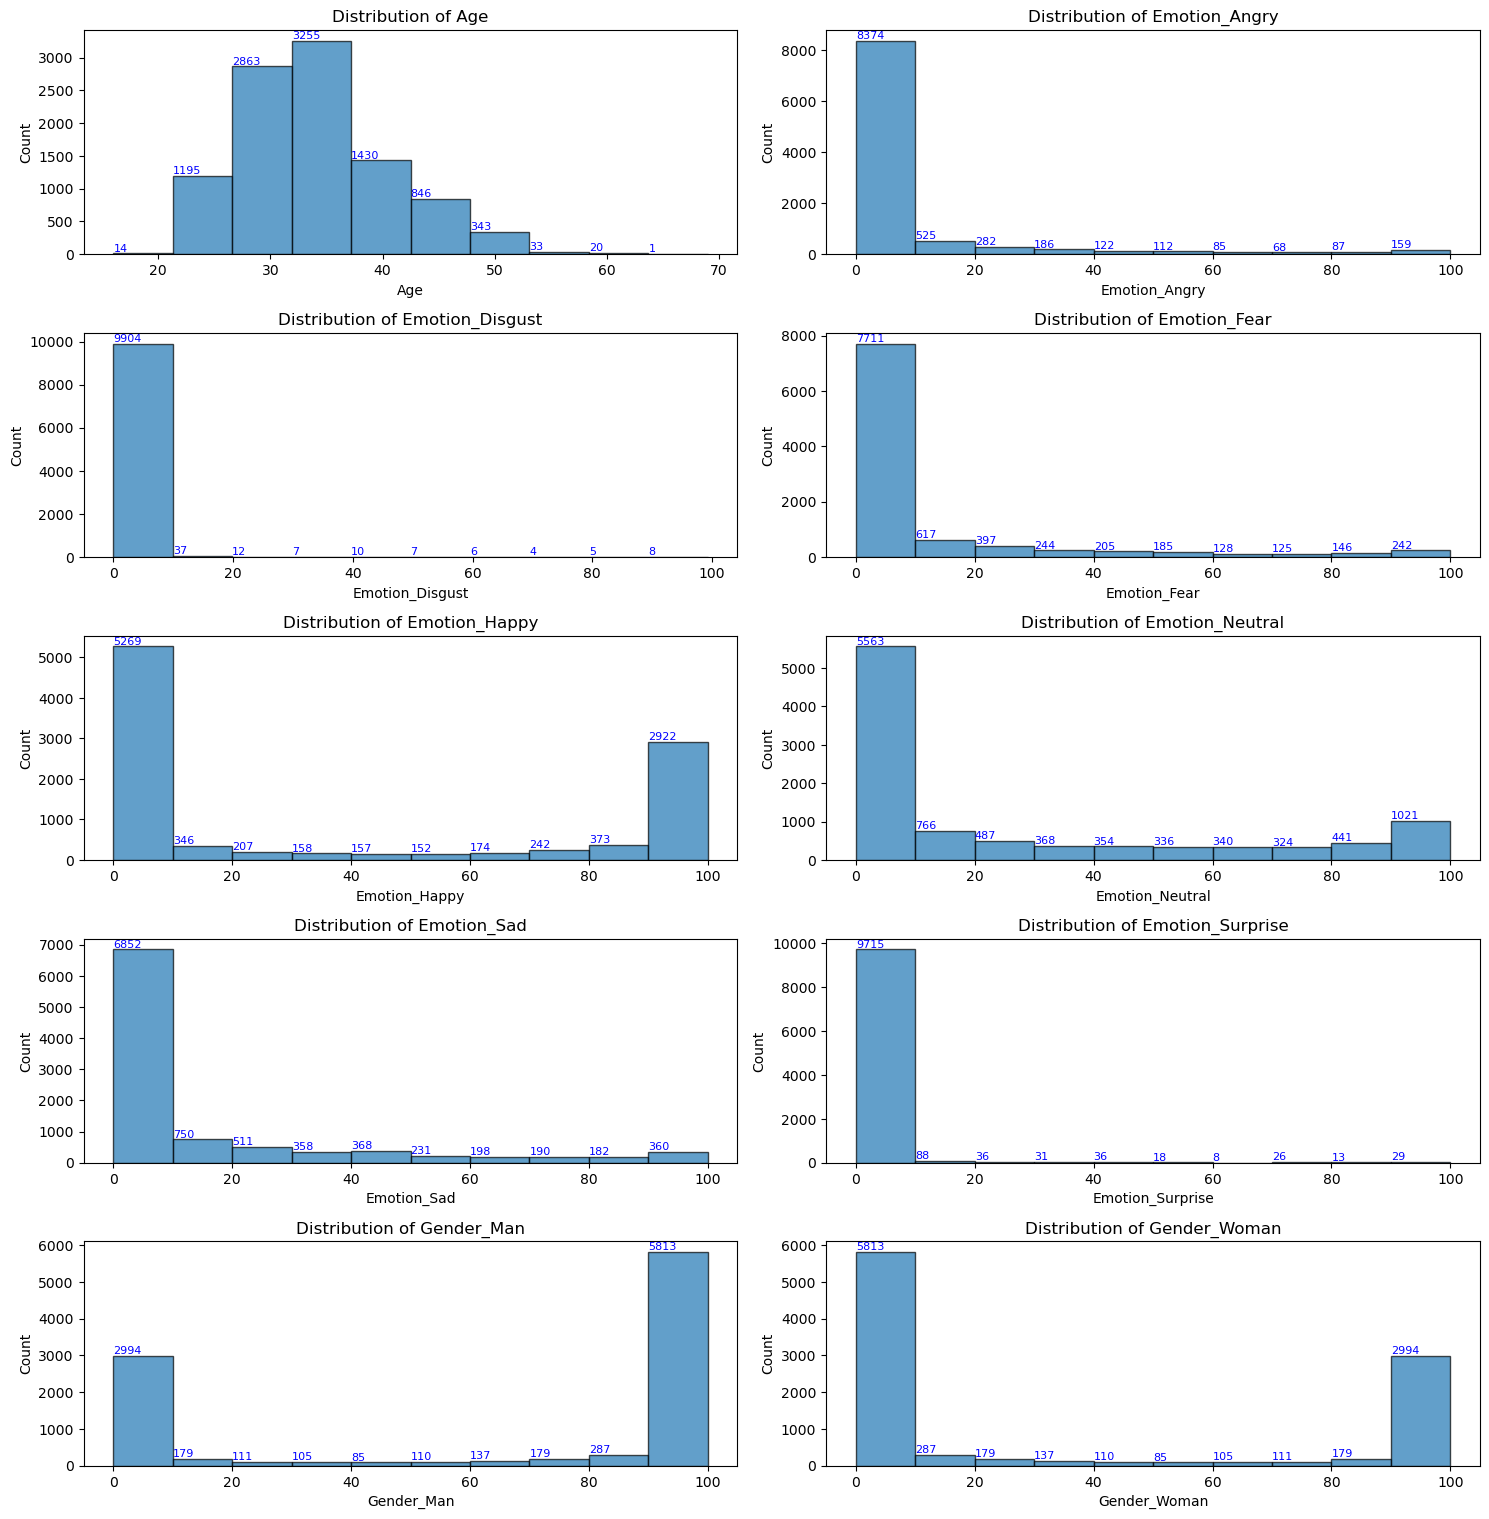

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns
exclude_cols = ["Image_Path", "Identity", "Embedding"]
numeric_cols = final_df.columns.difference(exclude_cols)

# Set up plots
plt.figure(figsize=(15, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)

    # Drop NaN values
    data = final_df[col].dropna()

    # Create histogram with 10 bins
    counts, bin_edges, _ = plt.hist(data, bins=10, edgecolor="black", alpha=0.7)

    # Show bin ranges and counts
    for j in range(len(counts)):
        plt.text(bin_edges[j], counts[j], str(int(counts[j])), ha='left', va='bottom', fontsize=8, color="blue")

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    
plt.tight_layout()
plt.show()


In [ ]:
# Face recognition (classification)

In [ ]:
pip install scikit-learn

In [ ]:
pip install xgboost

In [ ]:
pip install tqdm


In [28]:
import pandas as pd
import ast
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding

# Load the CSV file with embeddings
df = pd.read_csv("identities_with_images_labeled.csv")

# Limit the dataset to the first 50 entries
# df = df.iloc[:50]

# Convert the embeddings column to numpy arrays
df['Embedding'] = df['Embedding'].apply(lambda x: np.array(ast.literal_eval(x)))

# Step 3: Extract embeddings (X) and labels (y)
X = np.array(df['Embedding'].tolist())  # List of embeddings
y = df['Identity'].values  # Labels (assuming numeric)

# Step 4: (Optional) Scale the embeddings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Encode the labels to contiguous integers starting from 0
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Re-encoded labels

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 7: Create the XGBoost model
model = xgb.XGBClassifier(
    tree_method='hist',  # Use histogram-based tree method
    device='cuda',       # Use GPU (CUDA)
    n_estimators=100,    # Number of trees
    random_state=42,
    objective='multi:softmax',  # Multi-class classification
    num_class=len(np.unique(y_train))  # Number of classes
)

# Step 8: Define the progress bar for training
def fit_with_progress_bar(model, X_train, y_train, **kwargs):
    # Use the tqdm progress bar to wrap training
    for _ in tqdm(range(model.get_params().get('n_estimators', 100)), desc="Training progress", unit="trees"):
        model.fit(X_train, y_train, **kwargs)
    return model

# Step 9: Train the model with a progress bar
model = fit_with_progress_bar(model, X_train, y_train)

# Step 10: Make predictions
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
from sklearn.metrics import accuracy_score
print("Accuracy on test set:", accuracy_score(y_test, y_pred))

# Optionally, print the confusion matrix for further evaluation
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training progress: 100%|████████████████████████████████████| 100/100 [2:10:26<00:00, 78.26s/trees]


Accuracy on test set: 0.436
Confusion Matrix:
 [[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


Accuracy: 0.6345


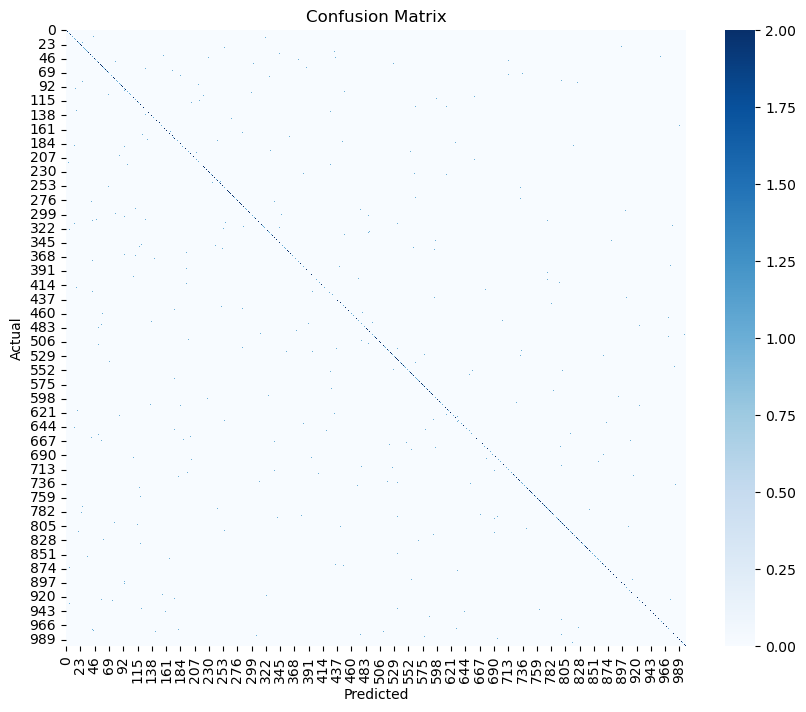

Overall ROC-AUC: 0.9099404404404405


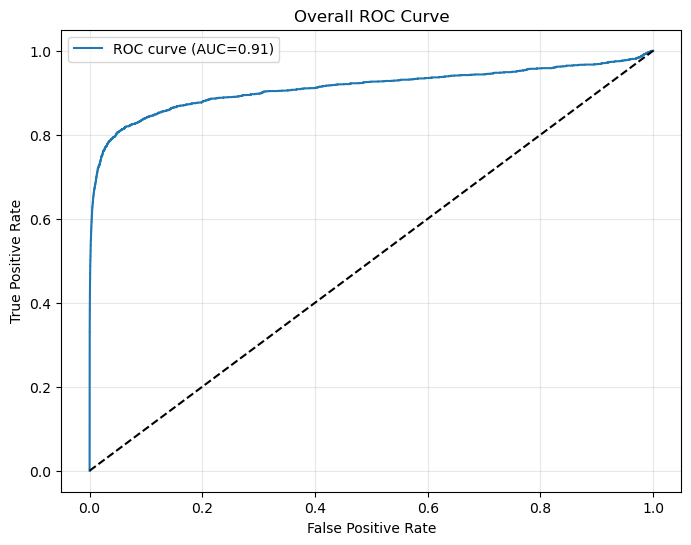

In [33]:
import pandas as pd
import numpy as np
import ast
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import Normalizer, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("identities_with_images_labeled.csv") # .iloc[:1000]
df['Embedding'] = df['Embedding'].apply(lambda x: np.array(ast.literal_eval(x)))

X = Normalizer(norm='l2').fit_transform(np.vstack(df['Embedding'].values))
y_encoded = LabelEncoder().fit_transform(df['Identity'].values)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

svm_rbf = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
y_proba = svm_rbf.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')
print("Overall ROC-AUC:", roc_auc)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Gender (classification)

Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       690
           1       0.94      0.95      0.94      1310

    accuracy                           0.93      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

MLP Classifier Results:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       690
           1       0.93      0.94      0.94      1310

    accuracy                           0.92      2000
   macro avg       0.91      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000

SVM Classifier Results:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       690
           1       0.94      0.95      0.95      1310

    accuracy                           0.93      2000
   macro avg       0.92      0.92      0.92   

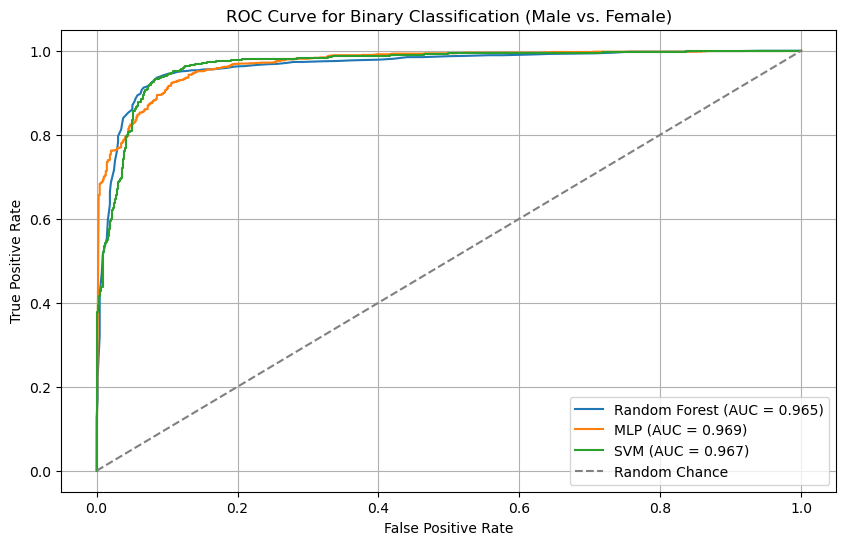

In [34]:
import pandas as pd
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the CSV file with embeddings and gender labels
df = pd.read_csv("identities_with_images_labeled.csv")

# Limit the dataset for testing
# df = df.iloc[:5000]  # Use only first rows for this example

# Convert the embeddings column to numpy arrays
df['Embedding'] = df['Embedding'].apply(lambda x: np.array(ast.literal_eval(x)))

# Step 1: Define a threshold for Gender_Man to create binary labels
threshold = 50  # If Gender_Man > 50, it's Male (1), else Female (0)
df['Gender_Label'] = np.where(df['Gender_Man'] > threshold, 1, 0)  # 1 = Male, 0 = Female

# Step 2: Extract embeddings (X) and binary gender labels (y)
X = np.array(df['Embedding'].tolist())  # Embeddings
y = df['Gender_Label'].values  # Binary gender labels (0 = Female, 1 = Male)

# Step 3: Scale the embeddings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train and evaluate Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for class '1' (Male)

# Step 6: Train and evaluate MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]  # Get probabilities for class '1' (Male)

# Step 7: Train and evaluate SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42, probability=True)  # Add probability=True to use predict_proba
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Get probabilities for class '1' (Male)

# Step 8: Print classification reports
print("Random Forest Classifier Results:")
print(classification_report(y_test, rf_pred))

print("MLP Classifier Results:")
print(classification_report(y_test, mlp_pred))

print("SVM Classifier Results:")
print(classification_report(y_test, svm_pred))

# Step 9: Accuracy Score for each model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("MLP Accuracy:", accuracy_score(y_test, mlp_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Step 10: Calculate AUC for each model
rf_auc = roc_auc_score(y_test, rf_pred_proba)
mlp_auc = roc_auc_score(y_test, mlp_pred_proba)
svm_auc = roc_auc_score(y_test, svm_pred_proba)

# Step 11: Print AUC for each model
print(f"Random Forest AUC: {rf_auc:.3f}")
print(f"MLP AUC: {mlp_auc:.3f}")
print(f"SVM AUC: {svm_auc:.3f}")

# Step 12: Plot ROC Curve for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_pred_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred_proba)

plt.figure(figsize=(10, 6))

# Plot the ROC curves
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {mlp_auc:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_auc:.3f})')

# Plot the diagonal line (representing random chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

# Add labels and title
plt.title('ROC Curve for Binary Classification (Male vs. Female)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Age (regression)

In [36]:
import pandas as pd
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the CSV file with embeddings and age labels
df = pd.read_csv("identities_with_images_labeled.csv")

# Convert the embeddings column to numpy arrays
df['Embedding'] = df['Embedding'].apply(lambda x: np.array(ast.literal_eval(x)))

# Extract embeddings (X) and labels (y)
X = np.array(df['Embedding'].tolist())  # Embeddings
y = df['Age'].values  # Age labels

# Scale the embeddings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train an SVM model for regression
svm_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=1.0)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R-squared (R2):", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 26.55055959856253
Mean Absolute Error (MAE): 3.9673476020469316
R-squared (R2): 0.4121310131848479


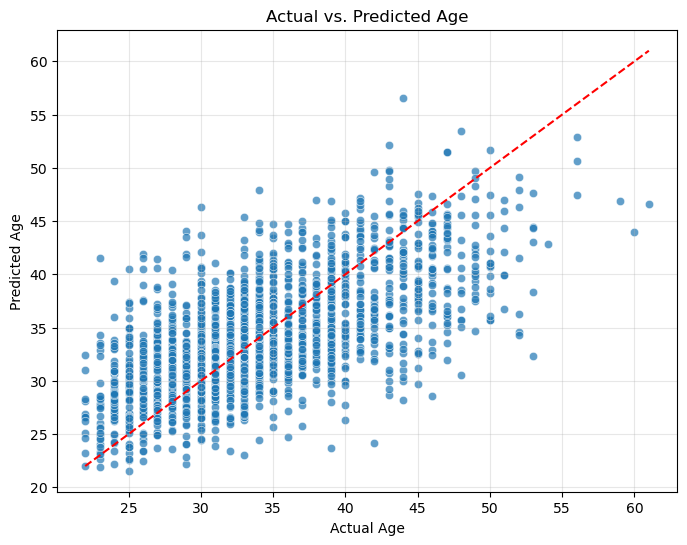

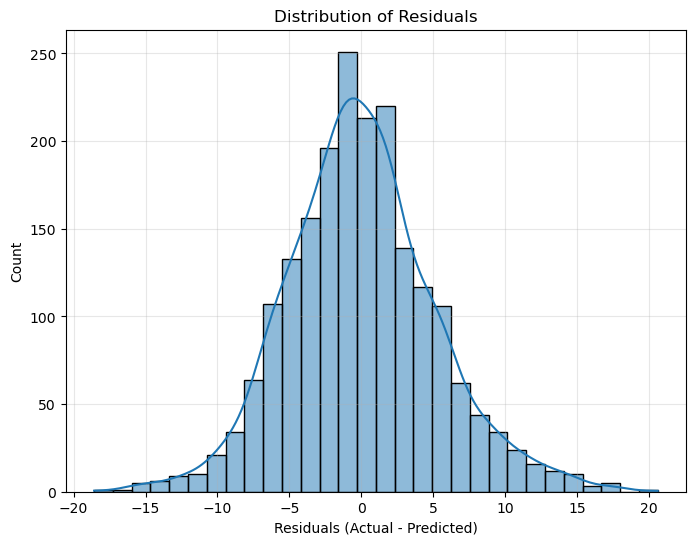

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Real vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs. Predicted Age')
plt.grid(alpha=0.3)
plt.show()

# Residuals distribution plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals (Actual - Predicted)')
plt.title('Distribution of Residuals')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Emotions

In [2]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("identities_with_images_labeled.csv")
df['Embedding'] = df['Embedding'].apply(lambda x: np.array(ast.literal_eval(x)))

# Convert multi-emotion probabilities to single categorical label
df['Emotion'] = df[['Emotion_Happy', 'Emotion_Sad', 'Emotion_Angry', 'Emotion_Surprise',
                    'Emotion_Fear', 'Emotion_Disgust', 'Emotion_Neutral']].idxmax(axis=1)

# Keep only emotions with sufficient samples
emotion_counts = df['Emotion'].value_counts()
df = df[df['Emotion'].isin(emotion_counts[emotion_counts > 1000].index)]

X = np.vstack(df['Embedding'].values)
y = df['Emotion'].values

# Encode labels numerically
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [4]:
# Display the mapping clearly
emotion_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(emotion_mapping)

{'Emotion_Fear': 0, 'Emotion_Happy': 1, 'Emotion_Neutral': 2, 'Emotion_Sad': 3}


Accuracy: 0.5272034820457019
                 precision    recall  f1-score   support

   Emotion_Fear       0.20      0.05      0.08       203
  Emotion_Happy       0.62      0.81      0.70       795
Emotion_Neutral       0.45      0.48      0.46       547
    Emotion_Sad       0.32      0.18      0.23       293

       accuracy                           0.53      1838
      macro avg       0.40      0.38      0.37      1838
   weighted avg       0.47      0.53      0.49      1838



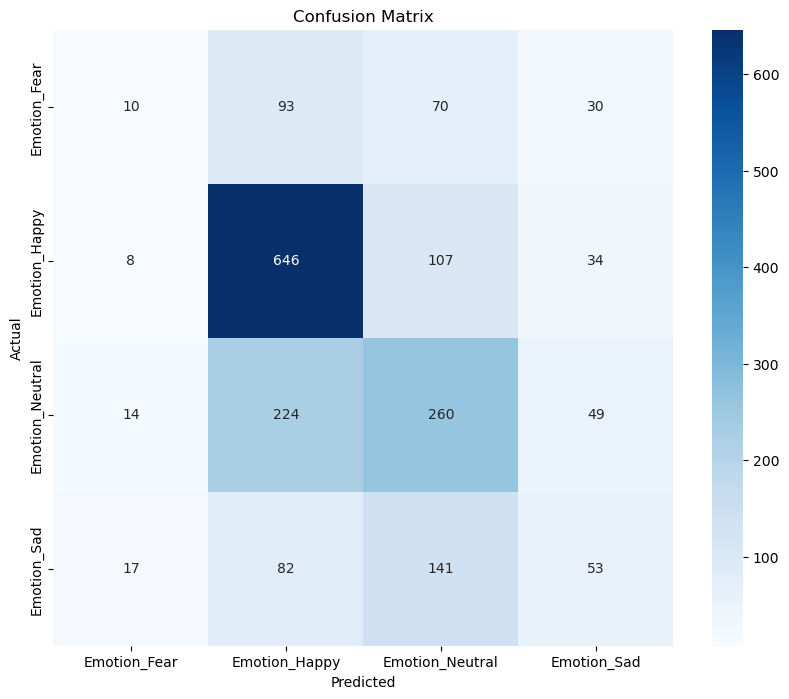

In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    tree_method='hist',
    device='cuda',
    n_estimators=500,
    learning_rate=0.03,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[0]	validation_0-mlogloss:1.34884	validation_1-mlogloss:1.37674
[50]	validation_0-mlogloss:0.43139	validation_1-mlogloss:1.16247
[100]	validation_0-mlogloss:0.18013	validation_1-mlogloss:1.11902
[150]	validation_0-mlogloss:0.09446	validation_1-mlogloss:1.12181
[200]	validation_0-mlogloss:0.05887	validation_1-mlogloss:1.13598
[250]	validation_0-mlogloss:0.04118	validation_1-mlogloss:1.15208
[300]	validation_0-mlogloss:0.03110	validation_1-mlogloss:1.16594
[350]	validation_0-mlogloss:0.02478	validation_1-mlogloss:1.18034
[400]	validation_0-mlogloss:0.02052	validation_1-mlogloss:1.19203
[450]	validation_0-mlogloss:0.01748	validation_1-mlogloss:1.20312
[499]	validation_0-mlogloss:0.01526	validation_1-mlogloss:1.21285
Accuracy: 0.509974610083424
                 precision    recall  f1-score   support

   Emotion_Fear       0.20      0.04      0.07       305
  Emotion_Happy       0.61      0.81      0.69      1192
Emotion_Neutral       0.42      0.42      0.42       820
    Emotion_Sad     

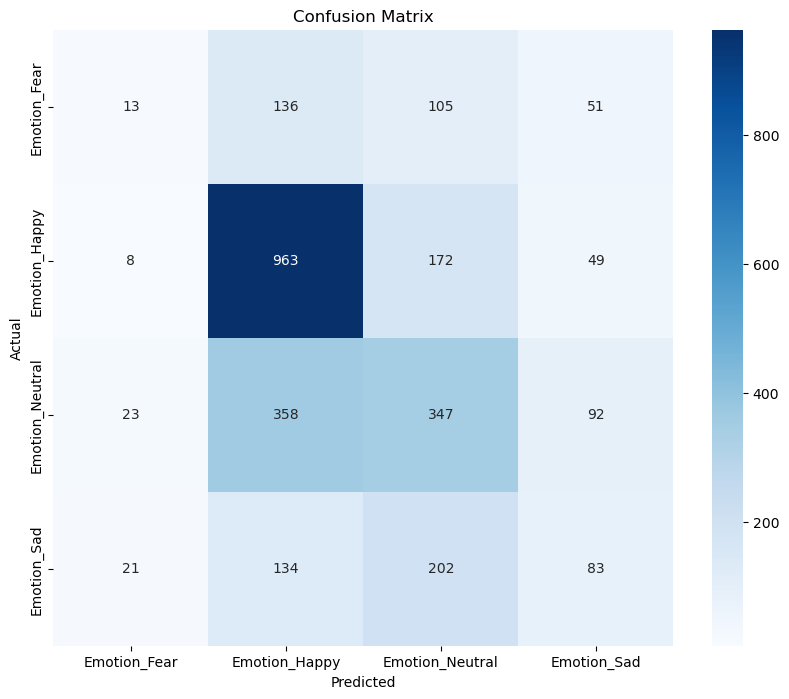

In [3]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("identities_with_images_labeled.csv")
df['Embedding'] = df['Embedding'].apply(lambda x: np.array(ast.literal_eval(x)))

# Convert multi-emotion probabilities to single categorical label
df['Emotion'] = df[['Emotion_Happy', 'Emotion_Sad', 'Emotion_Angry', 'Emotion_Surprise',
                    'Emotion_Fear', 'Emotion_Disgust', 'Emotion_Neutral']].idxmax(axis=1)

# Keep only emotions with sufficient samples
emotion_counts = df['Emotion'].value_counts()
df = df[df['Emotion'].isin(emotion_counts[emotion_counts > 1000].index)]

X = np.vstack(df['Embedding'].values)
y = df['Emotion'].values

# Encode labels numerically
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# XGBoost classifier with built-in progress bar
model = xgb.XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    tree_method='hist',
    device='cuda',
    n_estimators=500,
    learning_rate=0.03,
    max_depth=16,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=1
)

# Train with evaluation set to show progress
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=50
)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Training SVM...


SVM Training: 100%|██████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.12s/it]


SVM Accuracy: 0.5282916213275299
                 precision    recall  f1-score   support

   Emotion_Fear       0.22      0.14      0.17       203
  Emotion_Happy       0.69      0.72      0.70       795
Emotion_Neutral       0.46      0.49      0.48       547
    Emotion_Sad       0.34      0.36      0.35       293

       accuracy                           0.53      1838
      macro avg       0.43      0.43      0.42      1838
   weighted avg       0.52      0.53      0.52      1838



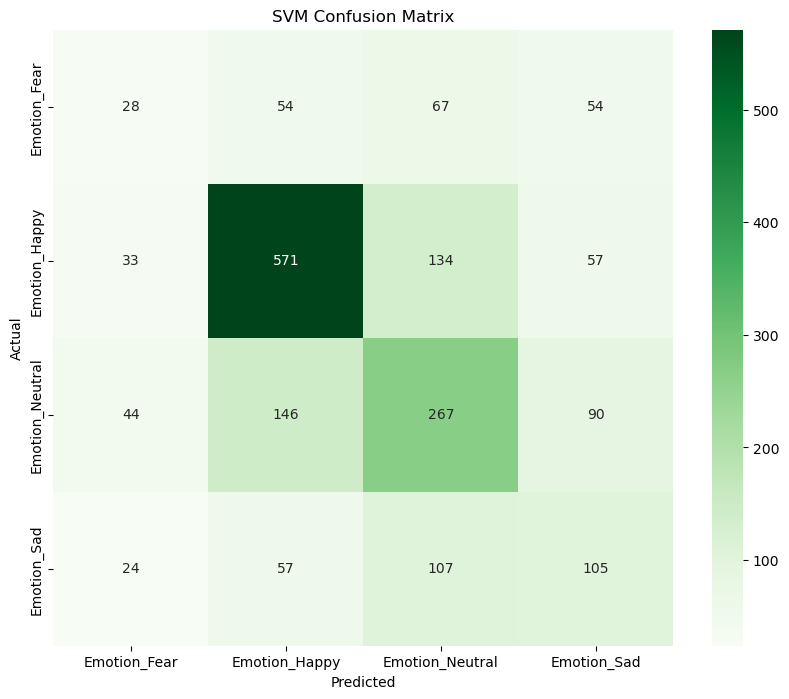

Training MLP...
Iteration 1, loss = 1.17965636
Validation score: 0.514286
Iteration 2, loss = 1.06799243
Validation score: 0.511565
Iteration 3, loss = 1.01950687
Validation score: 0.530612
Iteration 4, loss = 0.97980875
Validation score: 0.527891
Iteration 5, loss = 0.93845929
Validation score: 0.536054
Iteration 6, loss = 0.90497822
Validation score: 0.538776
Iteration 7, loss = 0.86379471
Validation score: 0.530612
Iteration 8, loss = 0.82171600
Validation score: 0.534694
Iteration 9, loss = 0.77987161
Validation score: 0.515646
Iteration 10, loss = 0.73382442
Validation score: 0.527891
Iteration 11, loss = 0.68937550
Validation score: 0.519728
Iteration 12, loss = 0.64696740
Validation score: 0.527891
Iteration 13, loss = 0.60100515
Validation score: 0.508844
Iteration 14, loss = 0.55992204
Validation score: 0.512925
Iteration 15, loss = 0.51514778
Validation score: 0.492517
Iteration 16, loss = 0.49298315
Validation score: 0.512925
Iteration 17, loss = 0.43893386
Validation score:

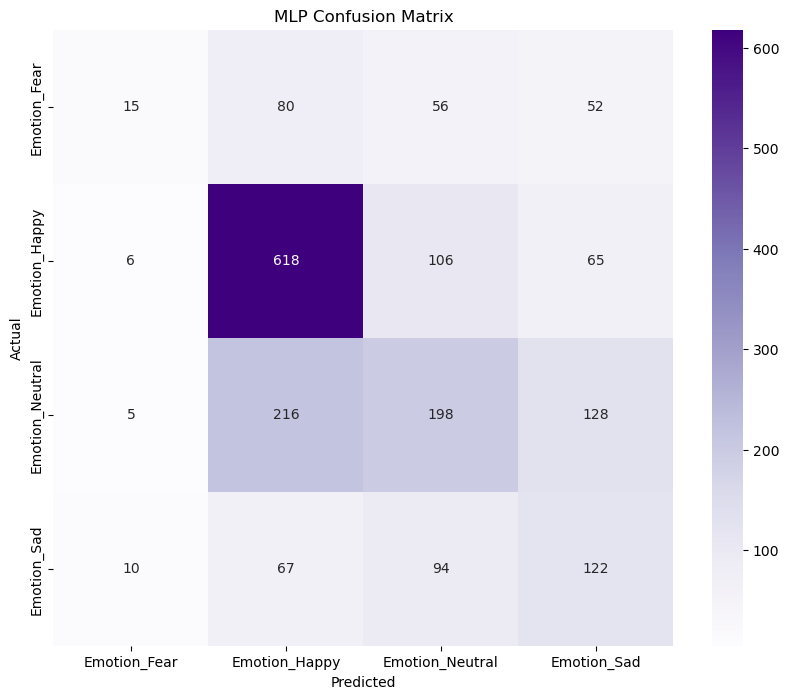

In [6]:
import numpy as np
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Data preparation
df['Emotion'] = df[['Emotion_Happy', 'Emotion_Neutral', 'Emotion_Sad', 'Emotion_Fear', 'Emotion_Angry']].idxmax(axis=1)

X = np.vstack(df['Embedding'].values)
y = df['Emotion'].values

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# SVM Classifier with progress bar
print("Training SVM...")
svm_model = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=42)

for _ in tqdm(range(1), desc="SVM Training"):
    svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=encoder.classes_))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10,8))
sns.heatmap(cm_svm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# MLP Classifier with progress bar
print("Training MLP...")
mlp_model = MLPClassifier(hidden_layer_sizes=(512, 256, 128),
                          activation='relu',
                          solver='adam',
                          learning_rate_init=0.0003,
                          max_iter=300,
                          early_stopping=True,
                          random_state=42,
                          verbose=True)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp, target_names=encoder.classes_))

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(10,8))
sns.heatmap(cm_mlp, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix')
plt.show()

SVM ROC-AUC: 0.7302
MLP ROC-AUC: 0.7342


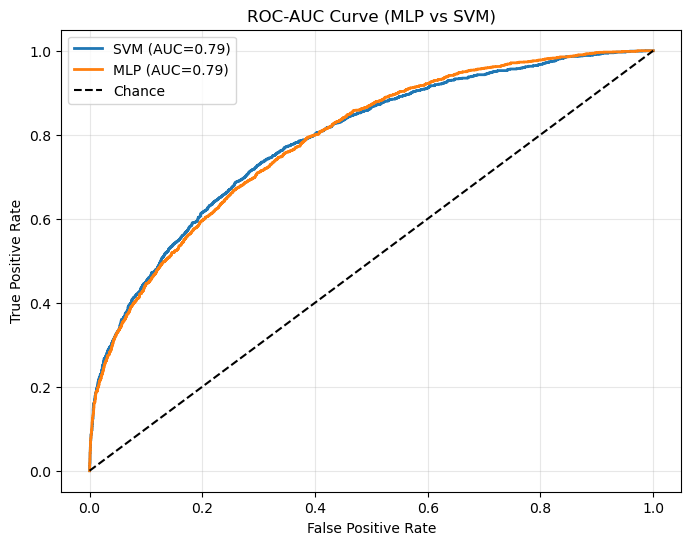

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get predicted probabilities from trained models
y_proba_svm = svm_model.predict_proba(X_test)
y_proba_mlp = mlp_model.predict_proba(X_test)

# Binarize labels for ROC-AUC
y_test_bin = label_binarize(y_test, classes=np.arange(len(encoder.classes_)))

# Compute ROC-AUC scores
roc_auc_svm = roc_auc_score(y_test_bin, y_proba_svm, multi_class='ovr', average='macro')
roc_auc_mlp = roc_auc_score(y_test_bin, y_proba_mlp, multi_class='ovr', average='macro')

print(f"SVM ROC-AUC: {roc_auc_svm:.4f}")
print(f"MLP ROC-AUC: {roc_auc_mlp:.4f}")

# Compute ROC curves
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin.ravel(), y_proba_svm.ravel())
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_bin.ravel(), y_proba_mlp.ravel())

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={auc(fpr_svm, tpr_svm):.2f})', linewidth=2)
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC={auc(fpr_mlp, tpr_mlp):.2f})', linewidth=2)
plt.plot([0,1],[0,1],'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (MLP vs SVM)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Emotions: happy, neutral, sad

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/100
25/25 [==============================] - 21s 790ms/step - loss: 1.1727 - accuracy: 0.4325 - val_loss: 0.9957 - val_accuracy: 0.4800
Epoch 2/100
25/25 [==============================] - 20s 819ms/step - loss: 0.9951 - accuracy: 0.5213 - val_loss: 1.0062 - val_accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 21s 832ms/step - loss: 0.9324 - accuracy: 0.5500 - val_loss: 0.9967 - val_accuracy: 0.4800
Epoch 4/100
25/25 [==============================] - 20s 797ms/step - loss: 0.8913 - accuracy: 0.5663 - val_loss: 0.9741 - val_accuracy: 0.4850
Epoch 5/100
25/25 [==============================] - 20s 823ms/step - loss: 0.8470 - accuracy: 0.5950 - val_loss: 0.9935 - val_accuracy: 0.5150
Epoch 6/100
25/25 [==============================] - 21s 832ms/step - loss: 0.8527 - accuracy: 0.6112 - val_loss: 0.9944 - val_accuracy: 0.5100
Epoch 7/100
25/25 [==============================] - 20s 794ms/step - loss: 0.7830 - accuracy: 0.6325 - val_loss: 0.9629 - val_accuracy:

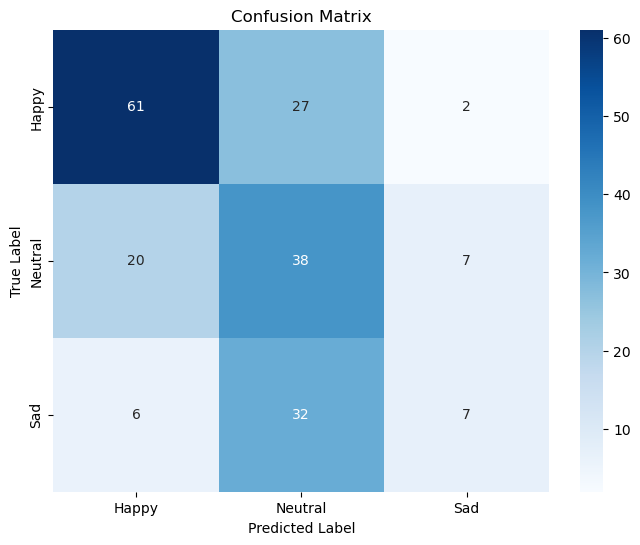

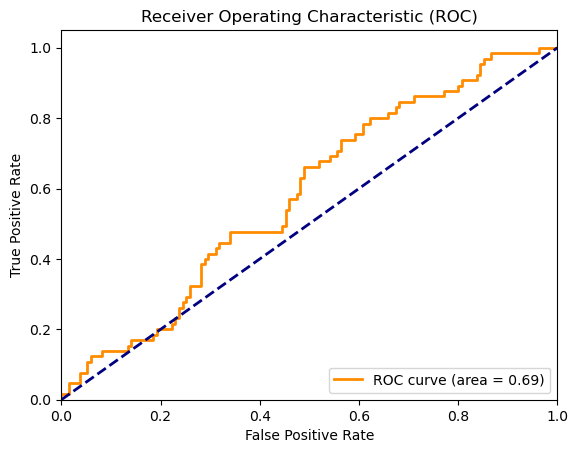

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for confusion matrix visualization
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback

# Load DataFrame
df = pd.read_csv("identities_with_images_labeled.csv")

# Convert multi-emotion probabilities to a single label
df['Emotion'] = df[['Emotion_Happy', 'Emotion_Sad', 'Emotion_Neutral']].idxmax(axis=1).str.replace('Emotion_', '')

# Encode labels
encoder = LabelEncoder()
df['Emotion'] = encoder.fit_transform(df['Emotion'])

# Use more data (at least 1000 samples for better learning)
df = df.sample(1000, random_state=42)

# Split into train/test
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Emotion'], random_state=42)

# Load images
def load_images(data):
    images = np.array([img_to_array(load_img(img, target_size=(250, 250))) / 255. for img in data['Image_Path']])
    labels = np.array(data['Emotion'])
    return images, labels

X_train, y_train = load_images(train_df)
X_test, y_test = load_images(test_df)

# Transfer Learning with MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(250,250,3), include_top=False, weights="imagenet")
base_model.trainable = False  # Freeze pre-trained layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(encoder.classes_), activation='softmax')
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback with patience
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train Model with Early Stopping and TQDM Progress Bar
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), 
          callbacks=[early_stopping, TqdmCallback()])

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

# Predicted labels and probabilities
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot Confusion Matrix with numbers
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AUC (Area Under the Curve) for each class
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1], pos_label=1)  # Change the index for multi-class AUC
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# pip install tqdm

Test Accuracy: 0.5603

Classification Report:
                 precision    recall  f1-score   support

  Emotion_Happy       0.64      0.78      0.70      1304
Emotion_Neutral       0.47      0.40      0.43       949
    Emotion_Sad       0.47      0.38      0.42       747

       accuracy                           0.56      3000
      macro avg       0.53      0.52      0.52      3000
   weighted avg       0.54      0.56      0.55      3000


Confusion Matrix:
[[1016  163  125]
 [ 378  384  187]
 [ 188  278  281]]


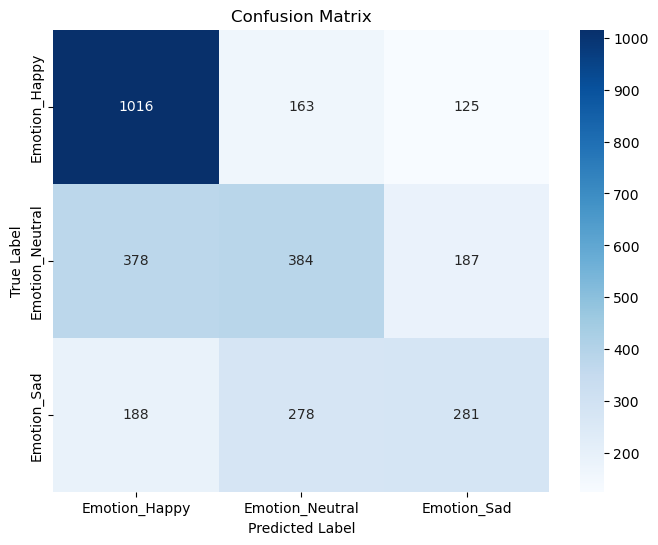

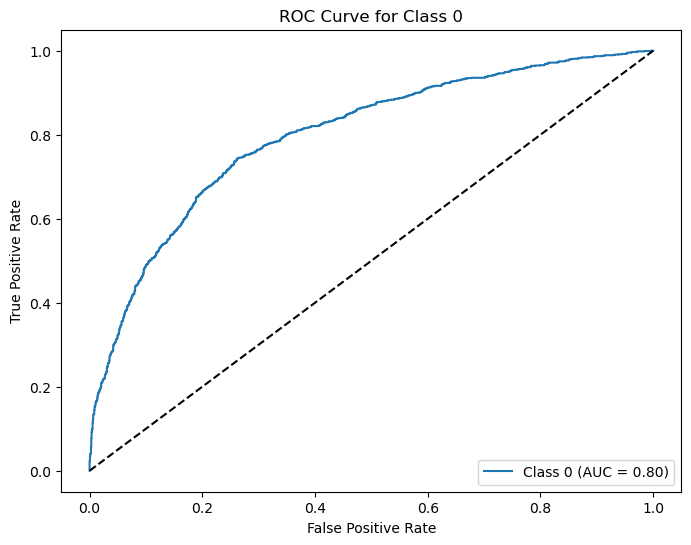

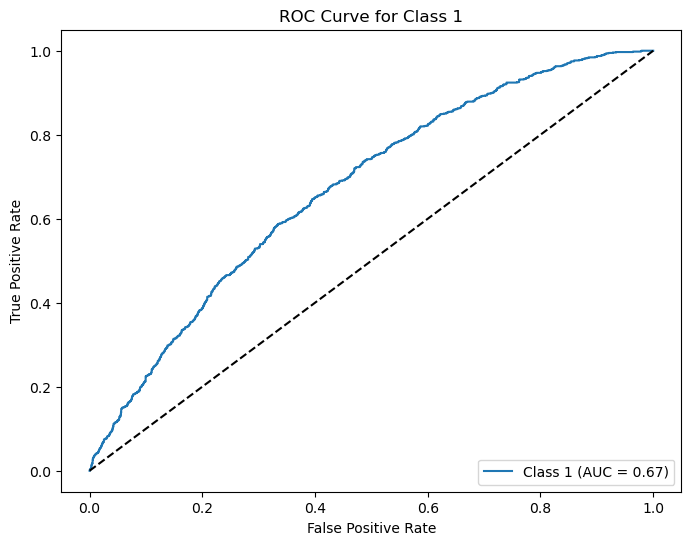

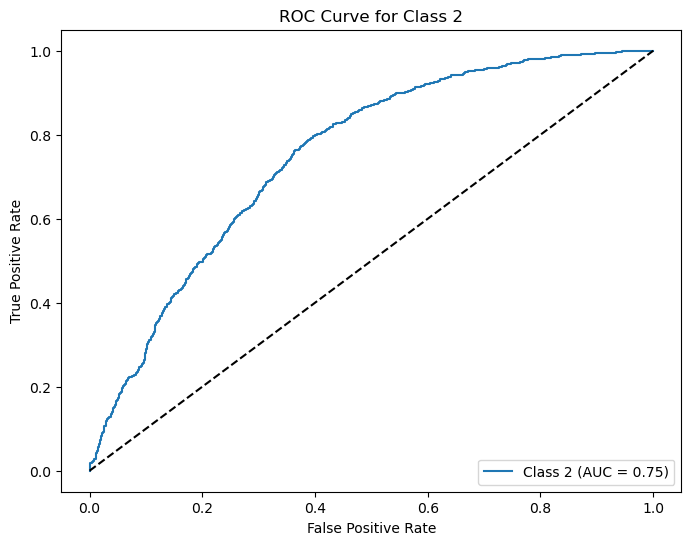


Average AUC Score: 0.7401


In [6]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Load the dataset
df = pd.read_csv("identities_with_images_labeled.csv")

# Convert the string representation of the embeddings to numpy arrays
df['Embedding'] = df['Embedding'].apply(lambda x: np.array(ast.literal_eval(x)))

# Convert multi-emotion probabilities to a single categorical label
df['Emotion'] = df[['Emotion_Happy', 'Emotion_Sad', 'Emotion_Neutral']].idxmax(axis=1)

# Encode labels numerically
encoder = LabelEncoder()
df['Emotion'] = encoder.fit_transform(df['Emotion'])

# Prepare features (X) and labels (y)
X = np.vstack(df['Embedding'].values)
y = df['Emotion'].values

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define the XGBoost model with the improved hyperparameters
params = {
    'subsample': 0.8,
    'reg_lambda': 1.0,
    'reg_alpha': 0.6,
    'n_estimators': 300,
    'max_depth': 8,
    'learning_rate': 0.1,
    'gamma': 0.3,
    'colsample_bytree': 0.4,
    'objective': 'multi:softmax',  # For multi-class classification
    'num_class': len(np.unique(y))  # Number of classes
}

# Create an XGBoost classifier
model = xgb.XGBClassifier(**params)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report with class names
class_names = encoder.classes_
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix with class names
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC AUC - Binarize the labels for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = model.predict_proba(X_test)

# Calculate AUC for each class
roc_auc = {}
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve for Class {i}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Display overall average AUC score for multi-class classification
print(f"\nAverage AUC Score: {np.mean(list(roc_auc.values())):.4f}")


In [7]:
df.describe()

Identity           Age    Gender_Man  Gender_Woman  Emotion_Happy  \
count  10000.000000  10000.000000  1.000000e+04  1.000000e+04   1.000000e+04   
mean    2628.482000     33.907800  6.445723e+01  3.554277e+01   3.838408e+01   
std     2129.623483      6.709993  4.480644e+01  4.480644e+01   4.414093e+01   
min       45.000000     16.000000  1.631162e-12  6.682964e-08   1.716214e-18   
25%      880.750000     29.000000  1.078076e+00  5.699333e-02   3.719088e-02   
50%     1669.500000     33.000000  9.824367e+01  1.756335e+00   5.384894e+00   
75%     4899.250000     38.000000  9.994300e+01  9.892192e+01   9.516696e+01   
max    10736.000000     69.000000  1.000000e+02  1.000000e+02   1.000000e+02   

        Emotion_Sad  Emotion_Angry  Emotion_Surprise  Emotion_Fear  \
count  1.000000e+04   1.000000e+04      1.000000e+04  1.000000e+04   
mean   1.518186e+01   7.394428e+00      1.457534e+00  1.089934e+01   
std    2.586776e+01   1.854625e+01      8.626183e+00  2.246364e+01   
min    1.114092e-21   3.292686e-21      8.021420e-35  6.675200e-28   
25%    1.382497e-02   5.555565e-04      5.125483e-05  1.863726e-03   
50%    1.353328e+00   1.184256e-01      3.074222e-03  4.479282e-01   
75%    1.808715e+01   3.459377e+00      6.488284e-02  8.075066e+00   
max    1.000000e+02   9.999956e+01      9.999113e+01  9.999999e+01   

       Emotion_Disgust  Emotion_Neutral       Emotion  
count     1.000000e+04     1.000000e+04  10000.000000  
mean      4.569249e-01     2.622583e+01      0.814400  
std       4.687728e+00     3.437473e+01      0.805864  
min       0.000000e+00     4.192056e-15      0.000000  
25%       1.708626e-09     3.179839e-01      0.000000  
50%       5.127647e-06     5.680738e+00      1.000000  
75%       1.025226e-03     4.896494e+01      1.000000  
max       9.930763e+01     9.999999e+01      2.000000